# Group 34: Predicting Subscription Status from Age and Play Time

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

As more improvements and innovations have been made in different aspects of video games such as mode and style design, video games started to play significant roles in the daily lives of individuals. A research group in the Computer Science department at the University of British Columbia (UBC), led by Professor Frank Wood, has established a Minecraft research server to collect data on how people interact within the game environment (1). Specifically, this research group collected two datasets, the players.csv summarized data about player information, and the sessions.csv which summarizes playing sessions. Our report further analyzes the data collected by this research group to investigate a specific question: Can total played hours and age predict subscription in the players.csv dataset? It is expected that players with greater played hours and a younger age would tend to subscribe the game-related newsletter.
<br>
<br>
In the players.csv dataset, there are 196 observations with 7 variables, summarizing players' information on the Minecraft server. Numerical data contains played hours and player age, character data contains the level of experience on the game, hashed email (user identifier), name of the players, and gender of the players. Logical data contains the status of the subscription to a game-related newsletter.

## Methods

### Wrangling

In [3]:
url_players <- "https://raw.githubusercontent.com/lucy-diaz/DSCIprojectgroup34/refs/heads/main/players.csv"
players <- read_csv(url_players)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
tidy_player<- players|>
        mutate(experience = factor(experience), gender = factor(gender),subscribe=factor(subscribe))
tidy_player

clean_player<- tidy_player|>
                select(subscribe,played_hours,Age)|>
                filter(played_hours!=0.0)|>
                filter(!is.na(Age))

clean_player


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
⋮,⋮,⋮
TRUE,0.1,44
FALSE,0.3,22
FALSE,2.3,17


### Summary

We used Knn-Classification to test if the age and playtime of players can predict their subscription status. Firstly, we wrangled the data to keep only the 3 variables needed, subscribe, played_hours and Age. Secondly, we split the data into training and testing in a 75:25 split. Once this was completed, the K value was chosen through cross-validation in a 5 fold split and the analysis completed using K = ????. We trained the model using the training data and then applied it to the testing data, creating a confusion matrix to interpret the recall/precision of our model.

### Visialization of Data Set

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


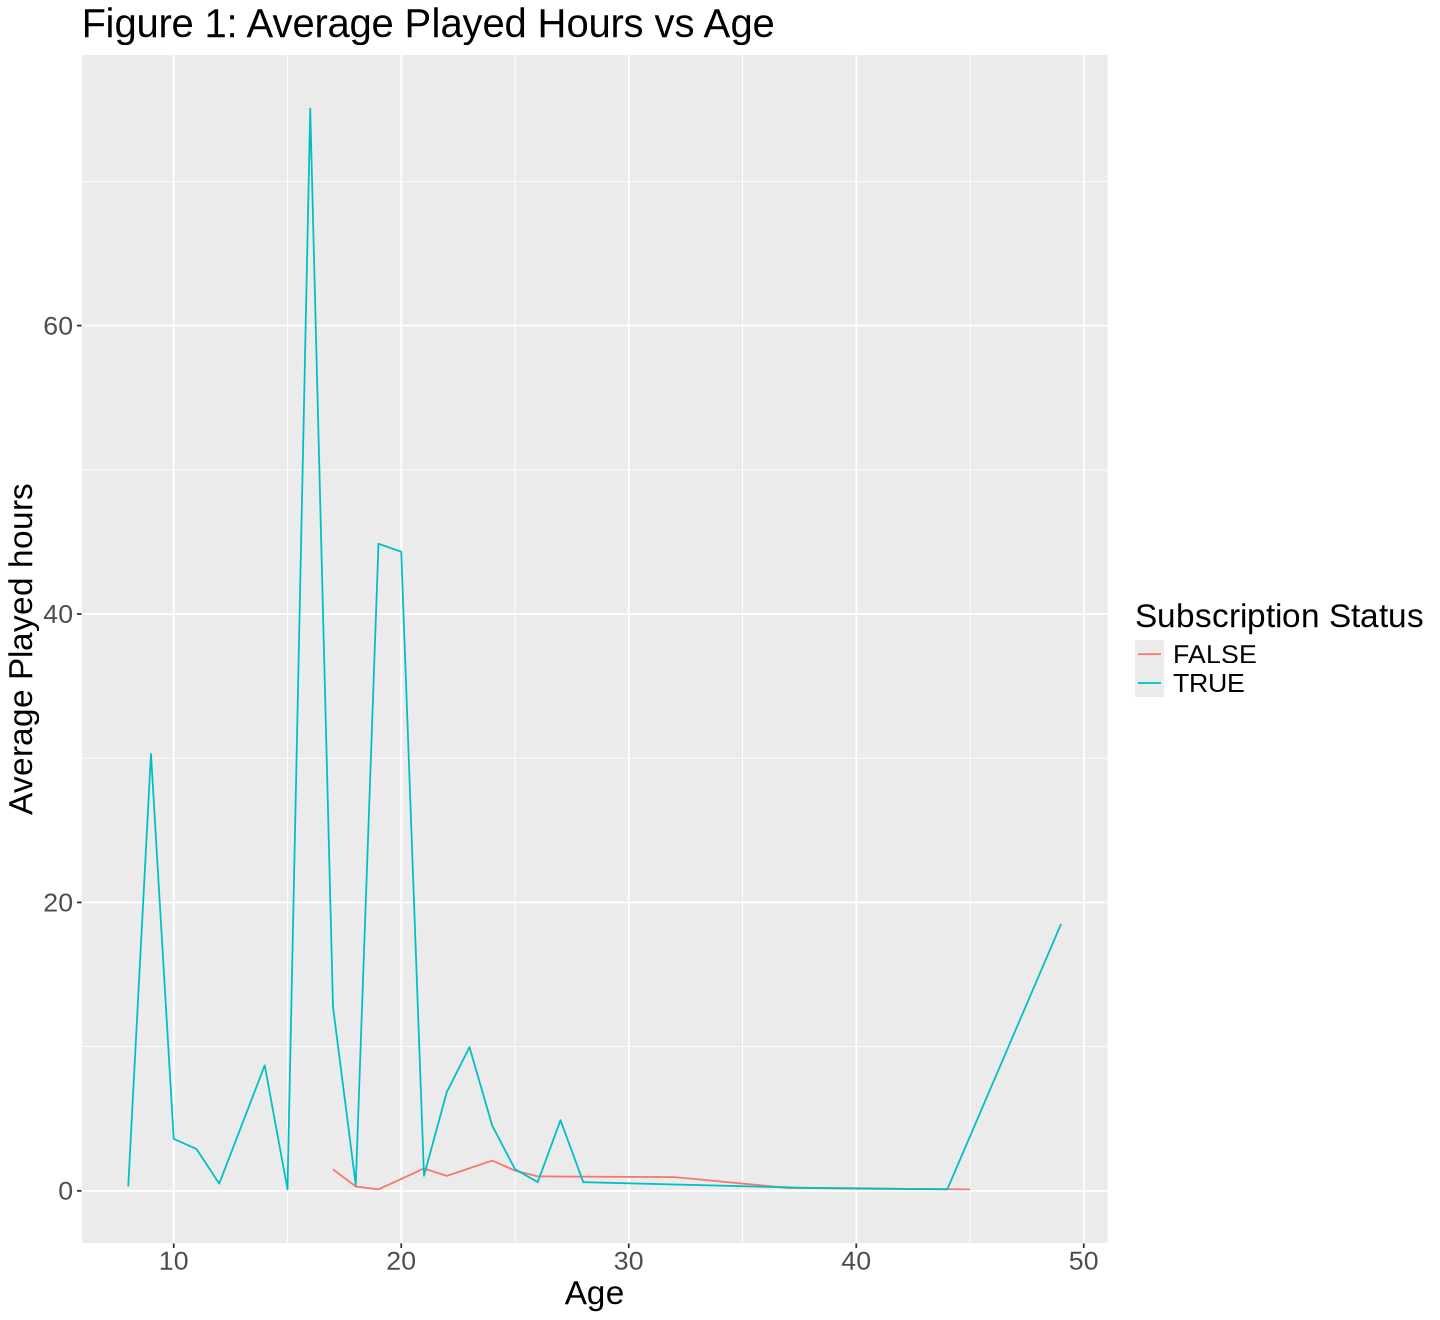

In [5]:
options(repr.plot.width = 12, repr.plot.height = 11)
age_average_played_hours <- clean_player |> group_by(Age, subscribe)|> summarize(average_played_hours = mean(played_hours))|>
ggplot(aes(x= Age, y= average_played_hours, color = subscribe))+
geom_line()+
labs(x= "Age", y= "Average Played hours", title = "Figure 1: Average Played Hours vs Age", color = "Subscription Status")+
theme(text = element_text(size = 20))
age_average_played_hours

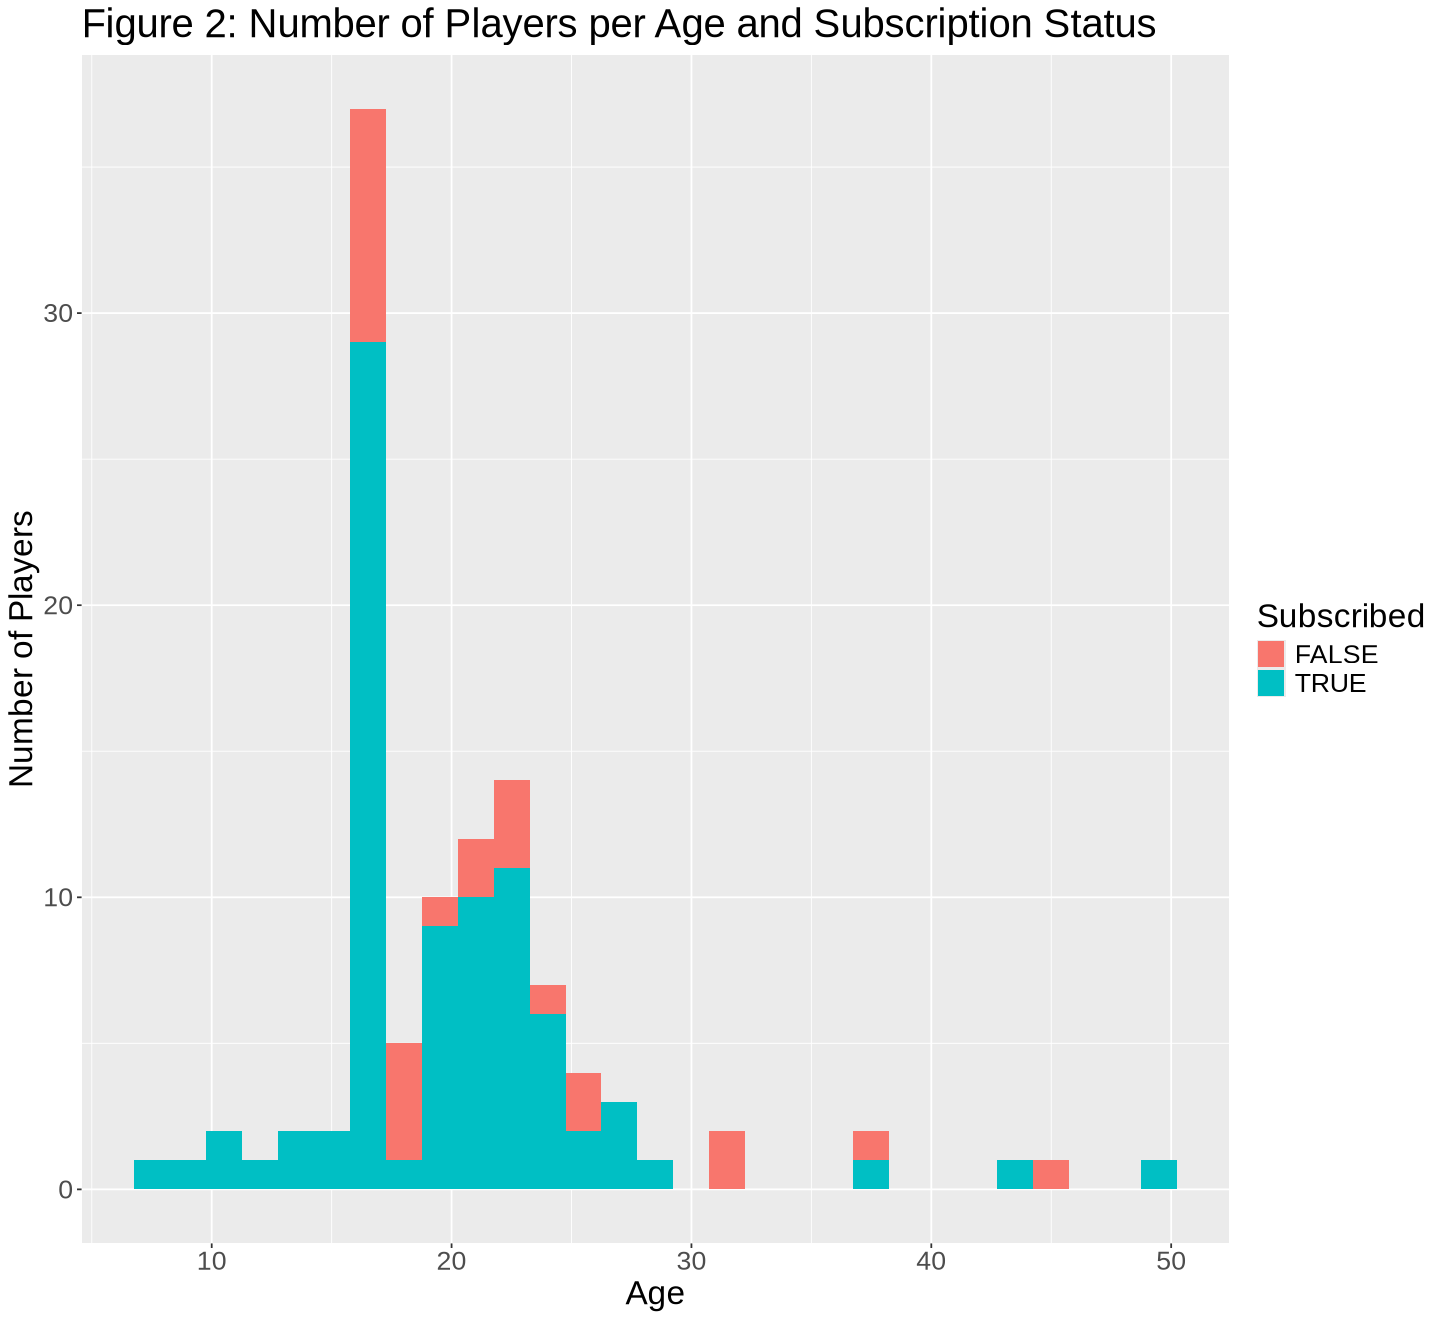

In [22]:
options(repr.plot.width = 12, repr.plot.height = 11)
age_observations <- clean_player |>
ggplot(aes(x= Age, fill = subscribe))+
geom_histogram(binwidth = 1.5)+
labs(x= "Age", y= "Number of Players", title = "Figure 2: Number of Players per Age and Subscription Status", fill = "Subscribed")+
theme(text = element_text(size = 20))
age_observations

### Analysis

### Analysis Visualization 

## Discussion

### Summary of Findings

### Hypothesis vs Results

### Impact

### Future Analysis

### Reference
(1)The University of British Columbia. (n.d.). Retrieved March 29, 2025, from https://canvas.ubc.ca/courses/153254/assignments/2055150?module_item_id=7644030
